In [1]:
import numpy as np
#import numpy.ma as ma

#from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.path as mplPath
from matplotlib import ticker


import os
#from IPython.display import clear_output
#import rasterio as rio
#from rasterio.enums import Resampling
#from rasterio.profiles import DefaultGTiffProfile

#from scipy import special
#from scipy.optimize import curve_fit
#from scipy.fft import fft, fftfreq
#from scipy.stats import chisquare
#from scipy import stats
#from scipy.interpolate import UnivariateSpline
#import scipy.signal as signal

#from sklearn import tree
#from sklearn.inspection import DecisionBoundaryDisplay
#from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import f1_score

plt.rcParams['text.usetex']=True
plt.style.use('classic')

    
def Prepare(indx,data0,data1,data2,data3,dth,uth):
    cond    = (indx[:,0]==1)&(indx[:,1]==2015)&(data3>=dth)&(data3<uth)
    pix_loc = list(np.unique(indx[cond,2]))
    for y in range (2015,2020):
        for m in range(1,13):
            if m == 8 and y == 2017:
                continue
            cond    = (indx[:,0]==m)&(indx[:,1]==y)&(data3>=dth)&(data3<uth)
            pix_loc = list(set(np.unique(indx[cond,2])) & set(pix_loc))
            
    pix_loc = np.array(pix_loc)
    tem = []
    odi = [] 
    ndv = []
    co2 = []
    
    for y in range (2015,2020):
        for m in range(1,13):
            if m == 8 and y == 2017:
                continue
            cond  = (indx[:,0]==m)&(indx[:,1]==y)&(np.isin(indx[:,2],pix_loc))
            co2.append(data0[cond])
            tem.append(data1[cond])
            ndv.append(data2[cond])
            odi.append(data3[cond])

    tem  = np.array(tem).T
    odi  = np.array(odi).T
    ndv  = np.array(ndv).T
    co2  = np.array(co2).T
    
    return co2,odi,tem,ndv,pix_loc

def Correlator(odi,xdata,ydata):
    month = np.arange(0,odi.shape[1],1,dtype=np.int32)
    result = np.zeros(month.shape)
    for m in (month):
        result[m] = stats.pearsonr(xdata[:,m],ydata[:,m])[0]
        #result[m] = stats.spearmanr(xdata[:,m],ydata[:,m])[0]
    return result

def Ave(result,l=3):
    reave = [[],[]]
    for i in range(0,59,l):
        if i>=31:
            j = i-1
        else:
            j = i
        if i == 30:
            k = j + 2
        else :
            k = j + 3
        reave[0].append(np.mean(result[j:k]))
        reave[1].append(np.std(result[j:k]))
    return np.array(reave)


def DataDiscriminator(index):
    nmonth = len(data_total)
    data   = np.zeros((5,nmonth))
    for k in range (nmonth):
        data[0,k] = data_total[k][:,2][0]
        data[1,k] = np.nanmean(data_total[k][:,index])
        data[2,k] = np.nanstd(data_total[k][:,index])
        data[3,k] = stats.skew(data_total[k][:,index],nan_policy='omit')
        data[4,k] = stats.kurtosis(data_total[k][:,index],nan_policy='omit')
    return data

def DataTrend(index,funcname):
    
    result     = DataDiscriminator(index)
    popt, pcov = curve_fit(funcname, result[0],result[1])
    
    print('Param:')
    print(popt)
    print()
    print('Errors:')
    print(np.sqrt(np.diag(pcov)))
    print()
    print('Mean (Fit) , Mean (Data):')
    print(np.mean(funcname(result[0],*popt)),np.mean(result[1]))
    print()
    print('Chi2:')
    print(np.sum((result[1]-funcname(result[0],*popt))**2/result[2]**2))
    return result,popt,pcov


def LS(period,t,x):
    w       = 2*np.pi/period 
    return signal.lombscargle(t, x, w, normalize=True)

In [2]:
path = './sec2/'

path_list  = sorted([f for f in os.listdir(str(path)) if f.endswith('.txt')])
data_total = []
for k in range (len(path_list)):
    data = np.loadtxt(path+path_list[k])
    data_total.append(data)

In [3]:
thre = []
for i in range(len(data_total)):
    low    = int(10**np.percentile(np.log10(data_total[i][:,6][data_total[i][:,6]>0]),16))
    high   = int(10**np.percentile(np.log10(data_total[i][:,6][data_total[i][:,6]>0]),84))
    medianl= int(10**np.percentile(np.log10(data_total[i][:,6][data_total[i][:,6]>0]),42))
    medianh= int(10**np.percentile(np.log10(data_total[i][:,6][data_total[i][:,6]>0]),58))
    std    = 10**np.nanstd(np.log10(data_total[i][:,6][data_total[i][:,6]>0]))
    maxi   = int(np.nanmax(data_total[i][:,6][data_total[i][:,6]>0])) + 1
    thre.append((low,medianl,medianh,high,maxi,std))
thre = np.mean(np.array(thre),axis=0)
#plt.hist(np.log10(data_total[4][:,6][data_total[4][:,6]>0]),bins=30)

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  
C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  


In [4]:
# plt.plot(data_total[4][:,-1][data_total[4][:,6]>high],'r.')
# plt.plot(data_total[4][:,-1][(data_total[4][:,6]>medianl)&(data_total[4][:,6]<medianh)&(data_total[4][:,-1]<256)]
#          ,'b.')

# # plt.hist(data_total[4][:,-1][(data_total[4][:,-1]<256)]
# #          ,bins=15,density=True)

In [5]:
# for i in range(0,12,1):
#     print(np.percentile(data_total[i][:,9][~np.isnan(data_total[i][:,9])],16),
#           np.percentile(data_total[i][:,9][~np.isnan(data_total[i][:,9])],50),
#          np.percentile(data_total[i][:,9][~np.isnan(data_total[i][:,9])],84),
#         np.percentile(data_total[i][:,9][~np.isnan(data_total[i][:,9])],100))
#     print()
    
# #plt.hist(data_total[4][:,5],bins=40)

In [6]:
# for i in range(len(data_total)):
#     print(np.percentile(data_total[i][:,5][~np.isnan(data_total[i][:,5])],16),
#           np.percentile(data_total[i][:,5][~np.isnan(data_total[i][:,5])],50),
#          np.percentile(data_total[i][:,5][~np.isnan(data_total[i][:,5])],84),
#         np.percentile(data_total[i][:,5][~np.isnan(data_total[i][:,5])],100))
#     print()
    
# #plt.hist(data_total[4][:,5],bins=40)

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less_equal
  import sys


[31, 26, 23, 18, 39, 59, 61, 55, 63, 54, 46, 47]



C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less_equal
  import sys


[1490, 1388, 1175, 1039, 969, 1120, 1693, 1995, 1915, 2196, 1895, 1563]



C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less_equal
  import sys


[4, 13, 15, 21, 12, 37, 35, 26, 24, 18, 16, 16]



C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less_equal
  import sys


[207, 331, 327, 512, 452, 261, 541, 415, 488, 539, 403, 169]



C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less_equal
  import sys


[1, 7, 14, 21, 2, 7, 11, 18, 10, 4, 8, 3]



C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less_equal
  import sys


[140, 202, 180, 229, 113, 150, 251, 160, 145, 131, 148, 63]



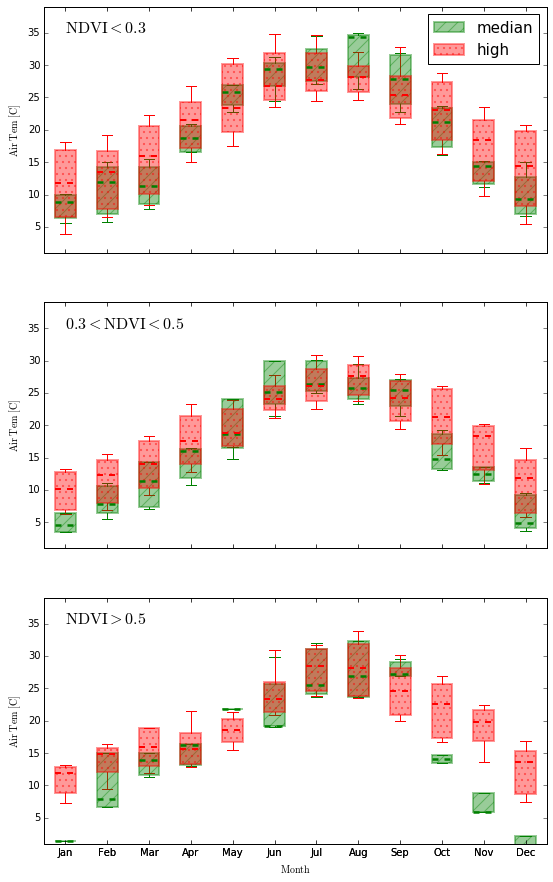

In [49]:
def TemBin(d,ndv,odi,b):
    y     = [[]for k in range(12)]
    yp    = [[]for k in range(12)]
    num   = []
    for i in range(len(d)):
        k    = int(np.mod((d[i][0,2]-1),12))
        cond = (d[i][:,5]>ndv[0])&(d[i][:,5]<=ndv[1])&(d[i][:,6]>odi[0])&(d[i][:,6]<=odi[1])&(d[i][:,-1]==b)
        y[k].append(d[i][cond,8][~np.isnan(d[i][cond,8])])        
    for i in range(12):
        for sublist in y[i]:
            for item in sublist:
                yp[i].append(item)
        num.append(len(yp[i]))
    return yp,num



fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1, figsize=(9, 15))
#plt.subplots_adjust(hspace=0.)

axs     = [ax1,ax2,ax3]
indx    = [0,1,2]

ndvithre  = [-10,0.3,0.5,10] #NDVI thresholds 
landcover = 13               #landcover


labels  = ['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

for ax,ind in zip(axs,indx):
    #print([ndvithre[ind],ndvithre[ind+1]],[thre[1],thre[2]])
    y,num        = TemBin(data_total,[ndvithre[ind],ndvithre[ind+1]],[thre[1],thre[2]],landcover)
    medianprops  = dict(linestyle='--', linewidth=2.5, color='g')
    boxprops     = dict(linestyle='-', linewidth=2, color='g',facecolor='green',hatch = '//',alpha=0.4)
    whiskerprops = dict(linestyle='-', linewidth=1, color='g')
    capprops     = dict(linestyle='-', linewidth=1, color='g')
    print(num)
    print()
    bplot1 = ax.boxplot(y,
                        whis        =[16,84],
                        showfliers  =False,
                        vert        =True,
                        patch_artist=True,
                        boxprops    =boxprops,
                        medianprops =medianprops,
                        whiskerprops=whiskerprops,
                        capprops    =capprops,
                        labels      =labels) 

    
    #print([ndvithre[ind],ndvithre[ind+1]],[thre[3],thre[4]])
    y,num        = TemBin(data_total,[ndvithre[ind],ndvithre[ind+1]],[thre[3],thre[4]],landcover)
    medianprops  = dict(linestyle='--', linewidth=2, color='r')
    boxprops     = dict(linestyle='-', linewidth=2, color='r',facecolor='red',hatch = '..',alpha=0.4)
    whiskerprops = dict(linestyle='-', linewidth=1, color='r')
    capprops     = dict(linestyle='-', linewidth=1, color='r')
    print(num)
    print()
    bplot2 = ax.boxplot(y,
                        whis        =[16,84],
                        showfliers  =False,
                        vert        =True,
                        patch_artist=True, 
                        boxprops    =boxprops,
                        medianprops =medianprops,
                        whiskerprops=whiskerprops,
                        capprops    =capprops,
                        labels      =labels) 
    
    
    ax.set_ylim(1,39)
    
    #ax.yaxis.grid(True)
ax1.text(1,35,r'$\rm NDVI<0.3$',fontsize=16)
ax2.text(1,35,r'$\rm 0.3<NDVI<0.5$',fontsize=16)
ax3.text(1,35,r'$\rm NDVI>0.5$',fontsize=16)

ax1.xaxis.set_major_formatter(plt.NullFormatter())
ax2.xaxis.set_major_formatter(plt.NullFormatter())
ax3.set_xlabel(r'$\rm Month$')

ax1.set_ylabel(r'$\rm Air \ Tem \ [C] $')
ax2.set_ylabel(r'$\rm Air \ Tem \ [C] $')
ax3.set_ylabel(r'$\rm Air \ Tem \ [C] $')

ax1.legend([bplot1["boxes"][0], bplot2["boxes"][0]], ['median', 'high'],fontsize=15)

plt.savefig('./3_3.tif',bbox_inches='tight')